In [ ]:
!pip install ultralytics
# Python imports
from ultralytics import YOLO
import os, IPython.display as disp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
DATA_YAML = "/content/drive/MyDrive/Project/Dataset/css-data/data.yaml"
assert os.path.exists(DATA_YAML), f"data.yaml not found at {DATA_YAML}"
print("Using data.yaml:", DATA_YAML)

Using data.yaml: /content/drive/MyDrive/Project/Dataset/css-data/data.yaml


In [ ]:
model = YOLO("yolov8s.pt")   # use yolov8n/yolov8s/yolov8m etc. Change model size if you want.
results = model.train(
    data=DATA_YAML,
    epochs=50,               # adjust
    imgsz=640,               # image size
    batch=16,                # change based on GPU VRAM
    workers=4,
    device=0,                # 0 for first GPU; use 'cpu' to force CPU
    project="/content/drive/MyDrive/Project/Dataset/runs/train",    # where runs are saved
    name="initial", # run-name
    exist_ok=False,          # set True to overwrite an existing run with same name
    save=True                # ensures weights are saved
)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Project/Dataset/css-data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=initial, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

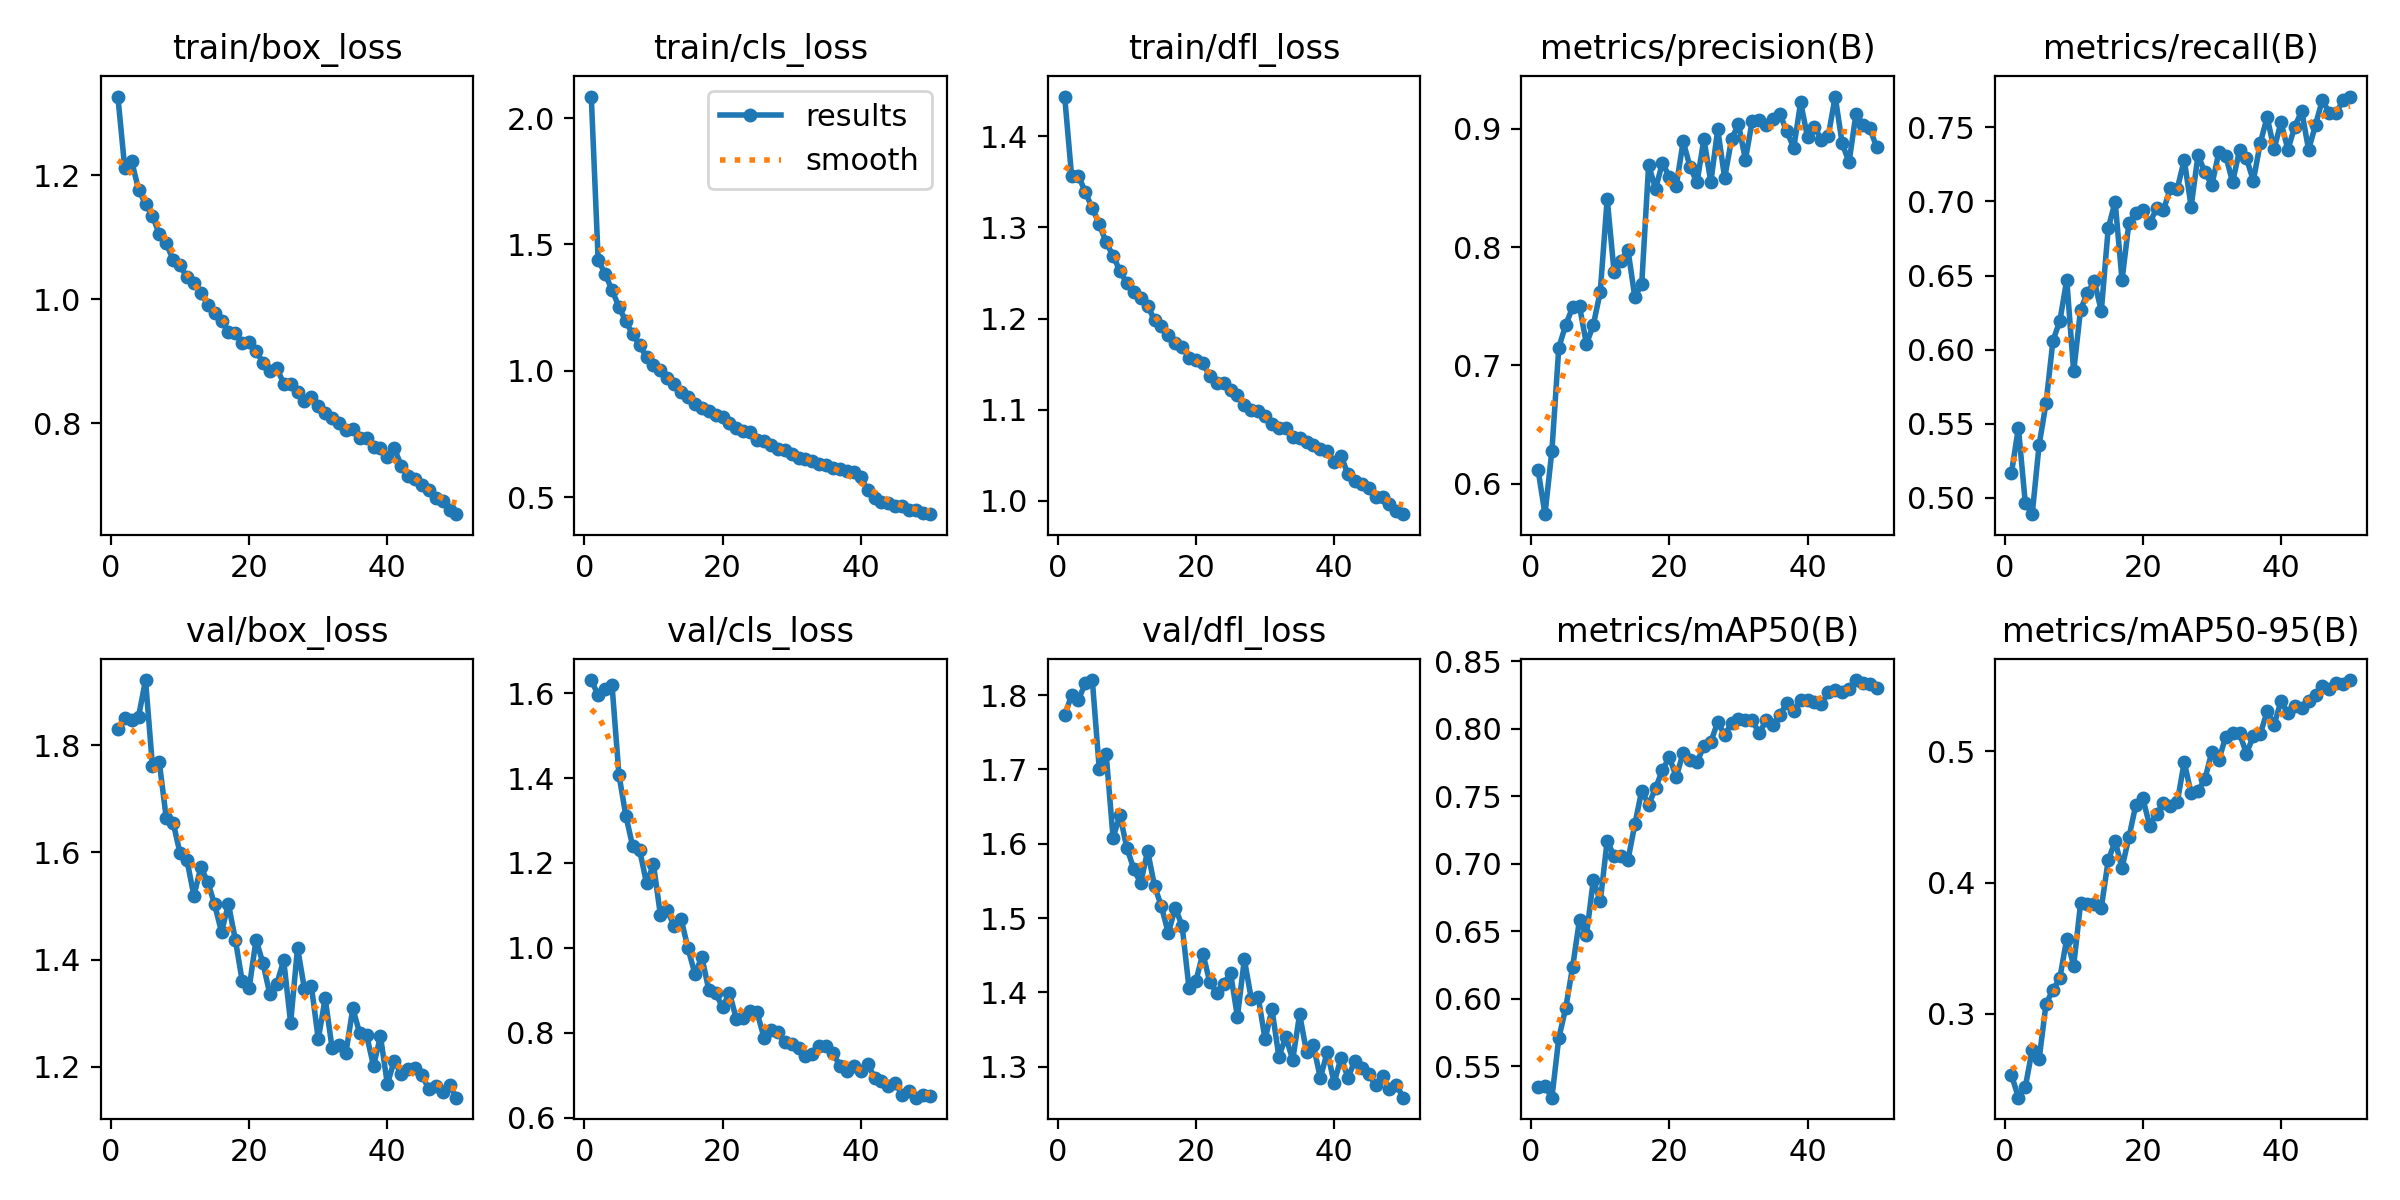

In [ ]:
run_dir = "/content/drive/MyDrive/Project/Dataset/runs/train/initial"   # change to your run name
img_path = os.path.join(run_dir, "results.png")
if os.path.exists(img_path):
    disp.display(disp.Image(img_path))
else:
    print("results.png not found yet. Check:", run_dir)

In [ ]:
import pandas as pd
csv_path = os.path.join(run_dir, "results.csv")
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    display(df.tail(10))
else:
    print("results.csv missing (maybe training still running).")


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
40,41,2482.17,0.75965,0.52786,1.04929,0.90123,0.73490,0.81994,0.52923,1.21157,0.72718,1.31234,0.000149,0.000149,0.000149
41,42,2538.53,0.73120,0.49757,1.02912,0.89078,0.75039,0.81843,0.53488,1.18726,0.69402,1.28512,0.000134,0.000134,0.000134
42,43,2595.04,0.71518,0.48154,1.02139,0.89393,0.76093,0.82712,0.53290,1.19660,0.68579,1.30830,0.000120,0.000120,0.000120
43,44,2651.53,0.70965,0.47689,1.01882,0.92711,0.73478,0.82902,0.53861,1.19815,0.67552,1.29770,0.000106,0.000106,0.000106
44,45,2709.41,0.69969,0.46662,1.01424,0.88774,0.75159,0.82758,0.54295,1.18518,0.68097,1.29049,0.000092,0.000092,0.000092
45,46,2767.89,0.69123,0.46494,1.00414,0.87152,0.76859,0.82956,0.54956,1.15836,0.65435,1.27479,0.000078,0.000078,0.000078
46,47,2825.57,0.67863,0.45185,1.00371,0.91234,0.75931,0.83621,0.54744,1.16444,0.66203,1.28734,0.000064,0.000064,0.000064
47,48,2883.50,0.67483,0.44892,0.99645,0.90326,0.75973,0.83431,0.55250,1.15410,0.64725,1.27014,0.000050,0.000050,0.000050
48,49,2941.38,0.66019,0.43646,0.98882,0.90033,0.76840,0.83344,0.55115,1.16651,0.65388,1.27558,0.000035,0.000035,0.000035
49,50,2998.33,0.65298,0.43346,0.98541,0.88436,0.77067,0.83060,0.55439,1.14274,0.65194,1.25838,0.000021,0.000021,0.000021


In [ ]:
from ultralytics import YOLO

DATA_YAML = "/content/drive/MyDrive/Project/Dataset/css-data/data.yaml"

model = YOLO("yolov8s.pt")

results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    workers=4,
    device=0,
    project="/content/drive/MyDrive/Project/Dataset/runs/train",
    name="augmented",
    exist_ok=False,
    save=True,
    # augmentations
    degrees=10,
    translate=0.1,
    scale=0.2,
    shear=2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Project/Dataset/css-data/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=augmented3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

Baseline Results (No Augmentation)


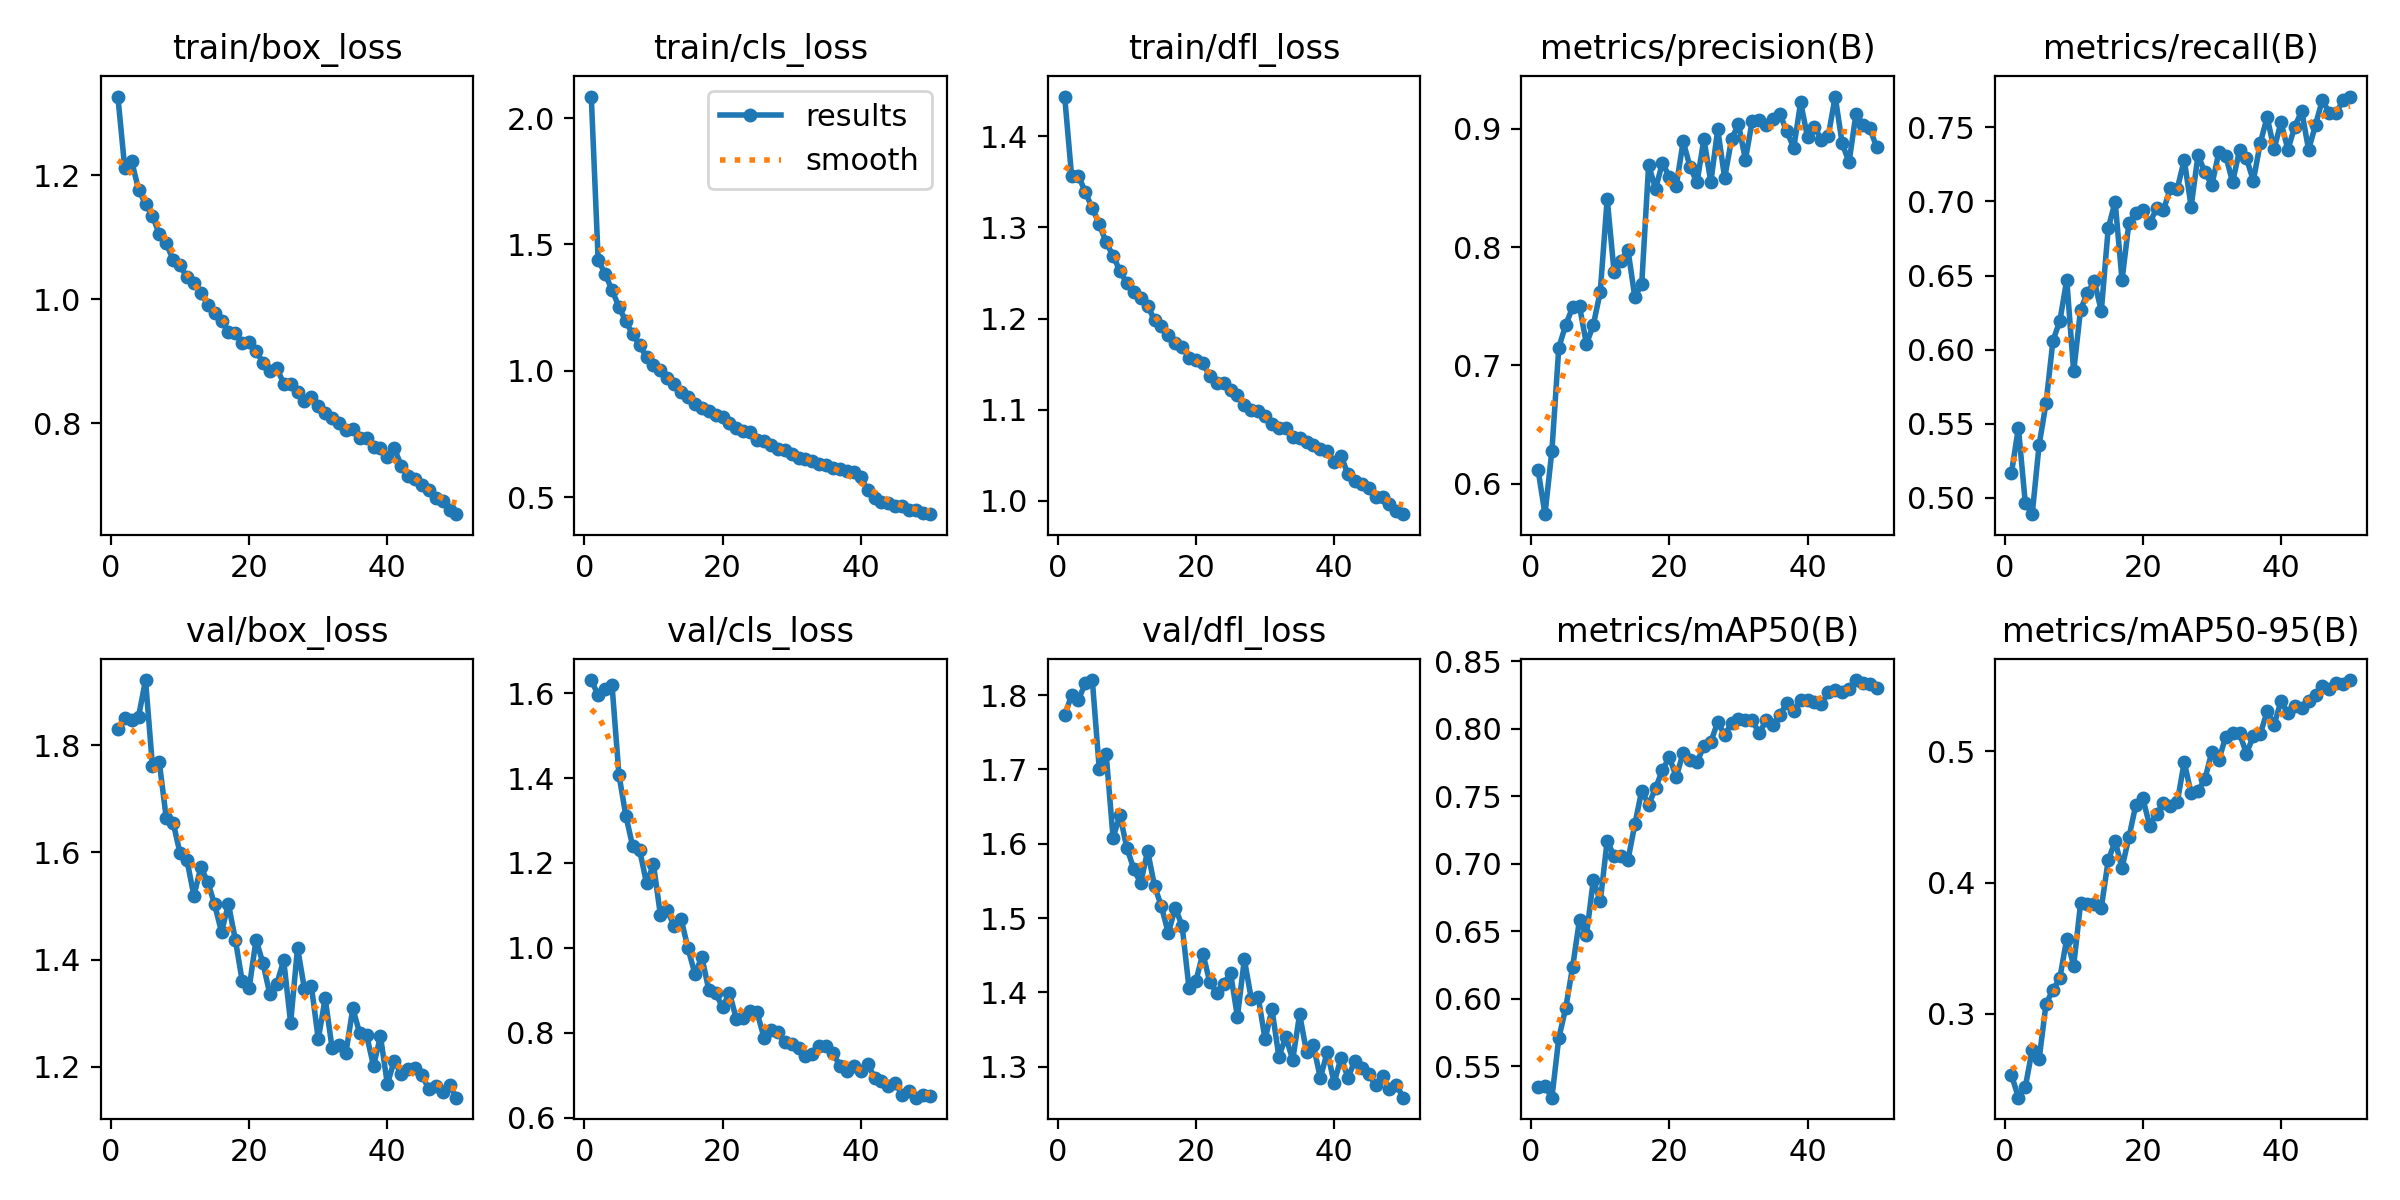

Augmented Results (With Augmentations)


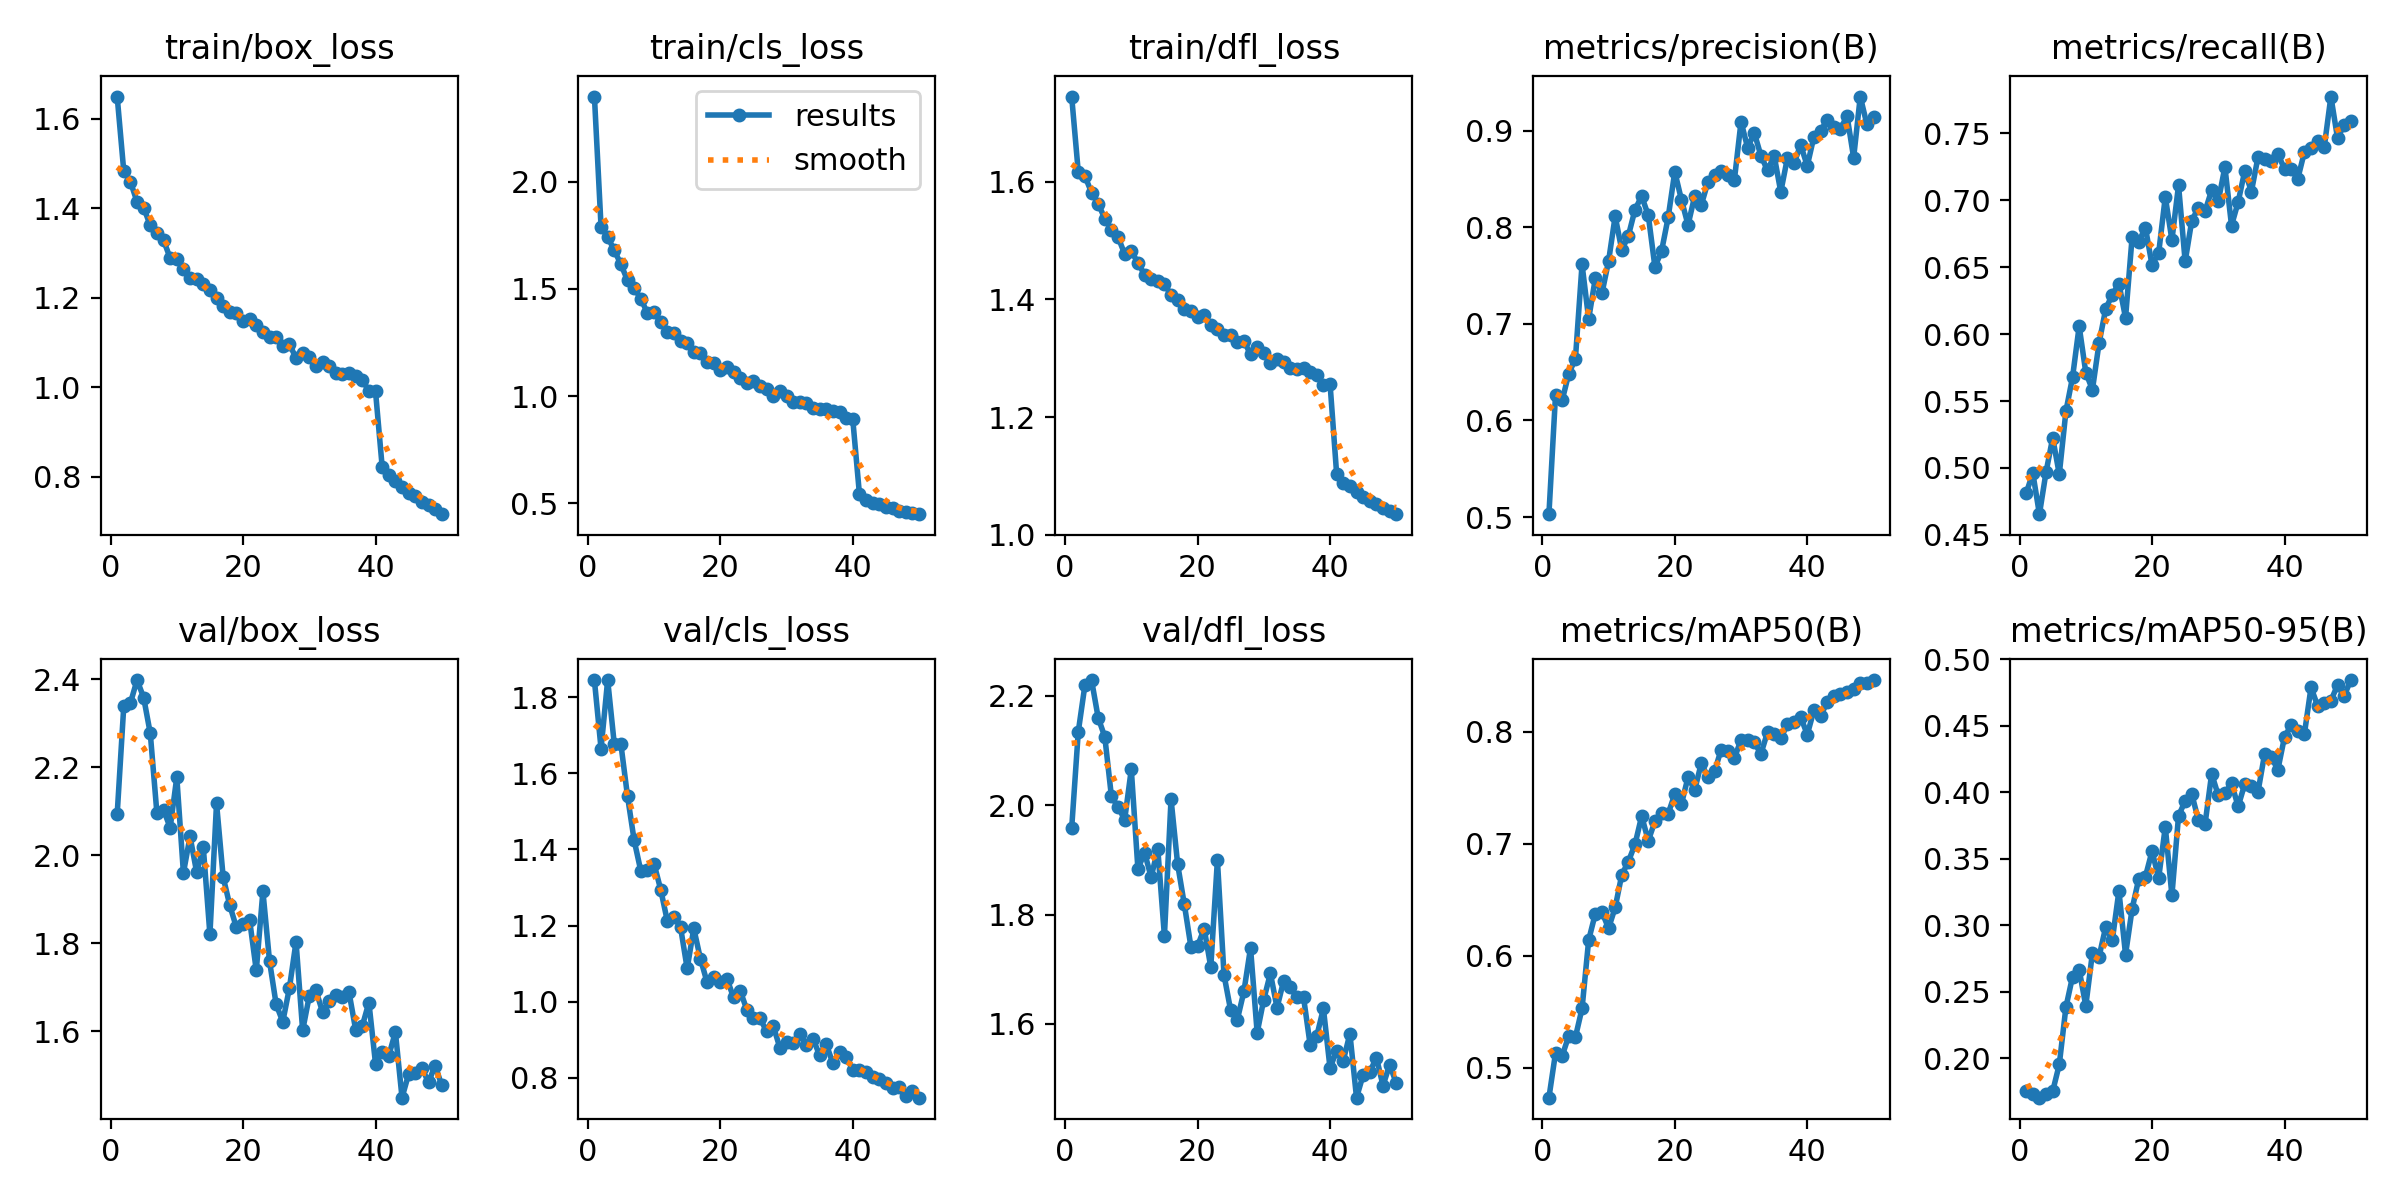

In [ ]:
from IPython.display import Image, display
# Show baseline training curve
print("Baseline Results (No Augmentation)")
display(Image(filename="/content/drive/MyDrive/Project/Dataset/runs/train/initial/results.png"))

# Show augmented training curve
print("Augmented Results (With Augmentations)")
display(Image(filename="/content/drive/MyDrive/Project/Dataset/runs/train/augmented3/results.png"))


In [ ]:
import pandas as pd

baseline_csv = "/content/drive/MyDrive/Project/Dataset/runs/train/initial/results.csv"
augmented_csv = "/content/drive/MyDrive/Project/Dataset/runs/train/augmented3/results.csv"

# Load results
df_base = pd.read_csv(baseline_csv)
df_aug = pd.read_csv(augmented_csv)

# Compare key metrics from last epoch
metrics = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
comparison = pd.DataFrame({
    "Metric": metrics,
    "Baseline": [df_base[m].iloc[-1] for m in metrics],
    "Augmented": [df_aug[m].iloc[-1] for m in metrics]
})
comparison["Change"] = comparison["Augmented"] - comparison["Baseline"]
print(comparison)


                 Metric  Baseline  Augmented   Change
0  metrics/precision(B)   0.88436    0.91454  0.03018
1     metrics/recall(B)   0.77067    0.75892 -0.01175
2      metrics/mAP50(B)   0.83060    0.84613  0.01553
3   metrics/mAP50-95(B)   0.55439    0.48449 -0.06990
